# Regression
- Target values are continuous values.
- Trong mô hình regression cần check __variable magnitude__ --> need to scaling features

## Linear model

**Assumption**

Nếu thoả mãn các assumption dưới đây thì coef và params của regression sẽ không bị bias và mô hình chính xác, còn vi phạm thì nên xem xét sử dụng non-linear model hoặc sử dụng transform feature engineer hoặc remove outliers:
- ___Linearity___: There is a linear relationship between predictors and target
- ___No perfect multicollinearity___: there are no perfect /high linear relationship between 2 or more of the predictors
- ___Normally distributed errors___: The residuals are random and normally distributed with a mean of 0
- ___Homoscedasticity___: at each level of the predictor variables, the variance of the error should be constant
- ___No Auto Correlation___: trong time-series model, Các biến Y ít có tương quan với nhau, kiểm định thông qua Durbin-Watson statistic

**Types of Linear models**
- Linear regression
- Ridge/Lasso regression
- Logistic regression
- Linear discriminant analysis - LDA

**Evaluate model performance**
- Kiểm tra xem có linear relationship between X and Y, X and other X
- Kiểm định auto-correlation bằng Durbin-Watson statistic
- Variance inflation factor (VIF) để check multi-collinearity
    - Các biến luôn có tương quan ít nhiều với nhau, khi hai biến có tương quan lớn với nhau sẽ làm giảm mức độ tin cậy của weight của các biến đó, tính giải thích cho biến phụ thuộc càng ít ý nghĩa. Do khi biến A thay đổi thì sẽ tác động trực tiếp đến biến B, từ đó mới tác động đến Y, chứ A ko tác động trực tiếp đến biến Y.
- Thiếu các biến quan trọng, giải thích tốt cho biến Y trong model
- Kiểm tra residuals distribution with zero-mean normal by Q-Q plot, or KS-test
- Ngoài việc xác định outliers từ sample thì detect outliers thông qua sự khác biệt giữa y_real và y_predicted theo `standardized residual` = `error` / `SE`
- Phân tích ảnh hưởng của high_leverage obs (Influential observations), hỗ trợ xác định anomaly, các pp:
    - hat-value > 2(p+1)/n
    - Cook's distance > 4/(n-p-1)

<AxesSubplot: >

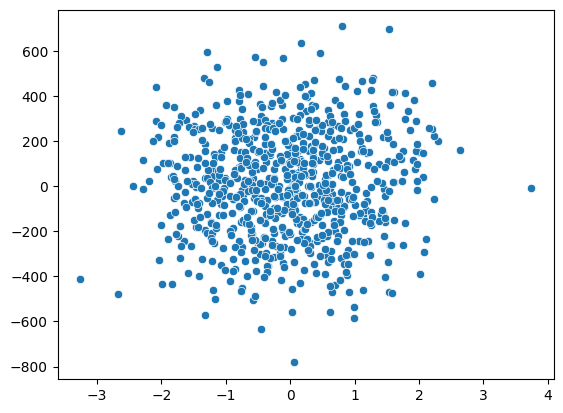

In [68]:
# make data
import numpy as np
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, y = make_regression(n_samples=1000, n_features=25, n_informative= 15, bias= 1, noise=50, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y)
sns.scatterplot(x = X_train[:,-1], y = y_train)

### OLS
- Minimize the `RSS` (sum of square of error)

$$RSS(\beta) = \sum_{i=1}^{n}(y_i - \hat{y_i})^2$$

where $RSS(\beta)$ is the residual sum of squares, $y_i$ is the dependent variable, $\beta_0$ is the intercept, $\beta_j$ are the regression coefficients, $x_{ij}$ are the independent variables, $n$ is the number of observations, $p$ is the number of independent variables, and $\lambda$ is the penalty parameter. The penalty term $\lambda\sum_{j=1}^{p}|\beta_j|^2$ is added to the OLS regression model to prevent overfitting and to encourage sparsity in the regression coefficients.

In [55]:
from sklearn import linear_model
reg = linear_model.LinearRegression(
         positive=False  # if Target y is positive, then set True
            )
reg.fit(X_train, y_train)

# R-squared score
reg.score(X_test, y_test)

0.8257897856095553

### Lasso Regression

Minimize `RSS_Lasso` :
$$\operatorname*{min}_{w}{\frac{1}{2n_{\mathrm{samples}}}}||X w-y||_{2}^{2}+\alpha||w||_{1} $$

where $\alpha$ is the regularization parameter

- Lasso giống OLS nhưng thêm phần `L1 Regularizations`penalty, `L1 Regularizations`penalty giúp model giảm thiểu bị over-fitting và tính phức tạp của model mạnh mẽ hơn `L2 Regularizations` penalty, Sử dụng `absolute of weights` , hay còn gọi là `L1` regularization penalty
- `alpha` càng cao thì more regularizations , tức là model càng giảm mạnh tính over-fitting
- L1 Regularizationspenalty : giảm overfit mạnh hơn L2
- Mô hình Lasso giảm sự phức tạp cho model, nên sẽ estimate ra nhiều `w(i)` = 0 hơn.
- **Lasso Phù hợp hơn khi áp dụng cho model tạo ra ít số lượng feature nhưng mỗi feature có high effect so với Ridge**

Lasso

In [56]:
reg = linear_model.Lasso(
    alpha=0.1,
    positive=False  # if Target y is positive, then set True
)
reg.fit(X_train, y_train)

# R-squared score
reg.score(X_test, y_test)

0.8259036390894249

LassoCV

In [57]:
# using LassoCV khi dữ liệu nhiều chiều high - dimensional datasets
reg = linear_model.LassoCV(alphas=np.logspace(-6, 6, 13))
reg.fit(X_train, y_train)

# R-squared score
print('alpha = ', reg.alpha_)

# R-squared score
reg.score(X_test, y_test)

alpha =  1.0


0.8266707896044623

LassoLarsCV

In [58]:
# using LassoLarsCV khi dữ liệu nhiều chiều high n_features và ít quan sát low n_samples (nhỏ hơn số n_features)
# LassoLarsCV is based on the Least Angle Regression algorithm.
reg = linear_model.LassoLarsCV()
reg.fit(X_train[:30], y_train[:30])

# R-squared score
print('alpha = ', reg.alpha_)

# R-squared score
reg.score(X_test, y_test)

alpha =  4.327832825318372


0.5948759288127505

__Model Selection__


1. For a linear Gaussian model, the maximum log-likelihood is defined as:
$$\log(\hat{L})=-\frac{n}2\mathrm{log}(2\pi)-\frac{n}2\mathrm{ln}(\sigma^{2})-\frac{\sum_{i=1}^{n}(y_{i}-\hat{y}_{i})^{2}}{2\sigma^{2}}$$
where $\sigma^{2}$ is an estimate of the `noise variance` and $n$ is the number of samples.

`noise variance` = $\sigma^{2}={\frac{\sum_{i=1}^{n}(y_{i}-{\hat{y}}_{i})^{2}}{n-p}}$

2. AIC and BIC
$$AIC=-2\log(\hat{L})+2d$$

$$BIC=-2\log(\hat{L})+\log(N)d$$

where $d$ is the number of parameters (degree of freedom).

LassoLarsIC

In [59]:
# LassoLarsIC ước lượng minimize AIC và BIC để làm phương pháp model selection
# BIC phạt nặng hơn sơ với AIC
# LassoLarsIC tính toán nhẹ hơn so với LassoCV do chỉ tính toán 1 lần thay vì k+1 lần cho k-fold CV
reg = linear_model.LassoLarsIC()
reg.fit(X_train, y_train)

# R-squared score
print('alpha = ', reg.alpha_)

# R-squared score
reg.score(X_test, y_test)

alpha =  2.4756569894173026


0.8264705204381142

### Ridge Regression

Minimize `RSS_Ridge` :
$$ \operatorname*{min}_{w}||X w-y||_{2}^{2}+\alpha||w||_{2}^{2} $$
where $\alpha$ is the regularization parameter

- Ridge giống OLS nhưng thêm phần `L2 Regularizations`, `L2 Regularizations` giúp model giảm thiểu bị over-fitting và tính phức tạp của model, Sử dụng `square of weights` , hay còn gọi là `L2` regularization
- `alpha` càng cao thì more regularizations , tức là model càng giảm mạnh tính over-fitting
- So sánh với L1 thì L2 tìm được nhiều điểm tối ưu hơn khi làm `loss` tiến về 0

![image.png](_images/4_ML_Algorithms/regression/cmpare_l1_l2.png)

- **Ridge Phù hợp hơn khi áp dụng cho dataset nhiều số lượng feature và mỗi feature có low effect tới target Y**

In [60]:
reg = linear_model.Ridge(alpha=1)
reg.fit(X_train, y_train)

# R-squared score
reg.score(X_test, y_test)

0.8256781508633866

In [61]:
# Ridge with cross validation
reg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
reg.fit(X_train, y_train)

# alpha
print('alpha = ', reg.alpha_)

# R-squared score
reg.score(X_test, y_test)

alpha =  10.0


0.8245713267410536

### Elastic-Net
Linear regression model trained with both L1 and L2 -norm regularization of the coef, học những features quan trọng (non-zero) như lasso và giữ được tính regularization của Ridge
- Elastic-net is useful cho dữ liệu có nhiều features tương quan với nhau
- Hai tham số cần tunning là `alpha` $\alpha$ và `l1_ratio` $p$, thuật toán minimize function:
$$\operatorname*{min}_{w}\frac{1}{2n_{\mathrm{samples}}}||X w-y||_{2}^{2}+\alpha\rho||w||_{1}+\frac{\alpha(1-\rho)}{2}||w||_{2}$$

- $p$ càng gần 1 thì càng ưu tiên tỷ trọng L1, gần 0 thì càng ưu tiên tỷ trọng L2

In [62]:
reg = linear_model.ElasticNetCV(
    alphas=np.logspace(-6, 6, 13),
    l1_ratio = [.1, .5, .7, .9, .95, .99, 1])
reg.fit(X_train, y_train)

# alpha, l1_ratio
print('alpha = ', reg.alpha_)
print('l1_ratio = ', reg.l1_ratio_)

# R-squared score
reg.score(X_test, y_test)

alpha =  1.0
l1_ratio =  1.0


0.8266707896044623

### Bayesian Regression
Ước lượng mô hình được tunning qua data, thu được kết quả là xác suất của Y với giả sử Y tuân theo Normal distribution với mean là ước lượng của y (Xw)
$$p(y|X,w,\alpha)=\mathcal{N}(y|X w,\alpha)$$
trong đó $\alpha$ là biến ngẫu nhiên

1. Pros
- Uớc lượng thích nghi, có thể tunning liên tục
- Sử dụng cả regularization trong quá trình ước lượng, tránh overfitting

2. Cons
- Tốn thời gian tính toán

__Bayesian Ridge Regression__
`BayesianRidge` ước lượng các hệ số mô hình xác suất, trong đó các coef $w$ được ước lượng thông qua $w$ ước lượng trước đó theo xác suất normal $p(w|\lambda)={\mathcal{N}}(w|0,\lambda^{-1}\mathbf{L}_{p})$

Các params cần tuning là $\alpha_1$, $\alpha_2$, $\lambda_1$, $\lambda_2$ lần lượng là tham số của gamma distribution ước lượng $\alpha$ và $\lambda$

- Ước lượng của `BayesianRidge` sẽ khác OLS do có quá trình cập nhật liên tục

In [63]:
reg = linear_model.BayesianRidge()
reg.fit(X_train, y_train)


# R-squared score
reg.score(X_test, y_test)

0.8250422695154389

### Logistic regression
- Mô hình ước lượng các xác suất cho 1 outcome cụ thể trong list các outcomes theo single trial theo hàm logistic, sử dụng Maximum likelihood estimation (MLE) để model ước lượng xác suất cho label.
- Mô hình được sử dụng cho việc phân loại, áp dụng cho `Binary`, `One-vs-Rest`, hoặc `multinomial logistic regression` with optional L1, L2 or Elastic-Net regularization.
- Categorical variable phải được encode sang numeric


**Logistic Function**
1. Logistic response function: transform function từ linear model sang xác suất p giúp đảm bảo p trong khoảng [0,1]
$$P(Y=1) ={\frac{1}{1+e^{-\left[\beta_{0}+\beta_{1}x_{1}+\beta_{2}x_{2}+\cdots+\beta_{q}x_{q}\right]}}} = {\frac{1}{1+\frac{1}{Odds(Y=1)}}}$$

2. Log odds - logit function: Map xác suất p từ [0,1] sang bất kỳ value nào sau khi transform, sử dụng linear model để dự đáon và invert logit function để lấy xác suất, kết hợp với cut-off rule để xác định nhãn cho Y
$$\log\,{\mathrm{(Odds}}(Y=1))=\beta_{0}+\beta_{1}x_{1}+\beta_{2}x_{2}+\cdots+\beta_{q}x_{q}$$

3. Minimize the Cost Function
$$\operatorname*{min}_{w} C \sum_{i=1}^{n}(-y_{i}\log({\hat{p}}(X_{i}))-(1-y_{i})\log(1-{\hat{p}}(X_{i})))+r(w)$$

- `C`: `C` càng cao, model càng phức tạp, tính Regularization càng nhỏ
- $r(w)$: phạt bổ sung theo L1, L2 or Elastic-Net, mặc định $\alpha$ = 1, cần tunning `l1_ratio` $\rho$ nếu dùng `ElasticNet`
    - `None`: 0
    - `L1`: $||w||_{1}$
    - `L2`: $\frac{1}{2}||w||_{2}^{2}$
    - `ElasticNet`: $\textstyle{\frac{1-\rho}{2}}||w||_{2}^{2}+\rho|\vert w\vert|_{1}$

**Solvers** 

([Chi tiết tại 1.1.11.3. Solvers](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression))
|                     | ‘lbfgs’ | ‘liblinear’ | ‘newton-cg’ | ‘newton-cholesky’ | ‘sag’ | ‘saga’ |
| ---------------------------- | ------- | ------- | ------- | ------- | ------- | ------- |
| __Penalties__                    |  |  |  |  | |  |
| Multinomial + L2 penalty     | yes     | no | yes | no | yes | yes |
| OVR + L2 penalty             | yes     | yes | yes | yes | yes | yes |
| Multinomial + L1 penalty     | no      | no | no | no | no | yes |
| OVR + L1 penalty             | no      | yes | no | no | no | yes |
| Elastic-Net                  | no      | no | no | no | no | yes |
| No penalty (‘none’)          | yes     | no | yes | yes | yes | yes |
| __Behaviors__                    |         |  |  |  |  |  |
| Penalize the intercept (bad) | no      | yes | no | no | no | no |
| Faster for large datasets    | no      | no | no | no | yes | yes |
| Robust to unscaled datasets  | yes     | yes | yes | yes | no | no |

- The “lbfgs” solver hiệu quả trong đa số TH. 
- “saga” solver chạy nhanh hơn cho dữ liệu lớn, hoặc có thể cân nhắc sử dụng `SGDClassifier` with `loss`="log_loss" để nhanh hơn nhưng yêu cầu tunning nhiều hơn để đạt hiệu quả.

**Dữ liệu imbalance**
- Phân loại sai từ 1 thành 0 sẽ tốn kém hơn phân loại sai từ 0 thành 1, ngưỡng cutoff cho class 1 (hiếm hơn 0) thường dưới 50% để đảm bảo khả năng predict 1 dễ bắt hơn.

**Logistic probability result**
- In practice, a upper cut-off probability (Y=1) often appropriate for the rare class.
- coeff 𝛽 in logistic is the log of odds ratio for X, so use the log scale to get the change for a unit change in X. Ví dụ, Hệ số biến X là -4.6 thể hiện khi biến X tăng lên 1 unit thì biến Y tăng exp(-4.6) = 0.01 lần, tức là giảm 100 lần.
- `Odds Ratio`: Thể hiện mối liên hệ giữa biến Y và X trong phân tích logistic regression, thể hiện Y=1 khi X=1 cao gấp OR lần Y=1 khi X=0, nếu OR =1 tức không có mỗi liên hệ nào giữa X và Y. Tuy nhiên, việc xác định khoảng tin cậy của OR sẽ ở range lớn, việc ta cần làm chỉ là cần biết khoảng tin cậy OR >1 tức thể hiện rằng biến Y và X có mỗi tương quan với nhau.
$${\mathrm{odds~ratio}}={\frac{\mathrm{Odds}(Y=1|X=1)}{\mathrm{Odds}(Y=1|X=0)}}$$
- `P-value`, giống như linear regression thì p-value mức độ quan trọng của biến hơn thay vì mức độ ý nghĩa của biến trong mô hình
- Sử dụng logistic L1-base như một phương pháp trong feature selection [1.13.4.1. L1-based feature selection](https://scikit-learn.org/stable/modules/feature_selection.html#l1-feature-selection)


In [64]:
# make logistic with cross-validation in BINARY
from sklearn.datasets import make_classification

X_cl, y_cl = make_classification(n_samples=200, n_features=20, n_informative=10, n_redundant=5, n_classes=2,)

logis = linear_model.LogisticRegressionCV(Cs = 20, penalty = 'l2', )
logis.fit(X_cl, y_cl)

print(logis.C_)

logis.score(X_cl, y_cl)

[0.23357215]


0.885

### Generalized Linear Models
GLM là một dạng mở rộng của linear regression thông qua:
1. Sử dụng hàm inverse link `h`: 
$$\hat{y}(w,X)\,=\,h(X w)$$
2. Sử dụng hàm unit deviation d, kết hợp với L2-regularization như một hàm Cost, cần minimize: 
$$\operatorname*{min}_{w}\frac{1}{2n_{\mathrm{samples}}}\sum_{i}d(y_{i},\hat{y}_{i})+\frac{\alpha}{2}\vert\vert w\vert\vert_{2}^{2}$$

Bảng các hàm unit deviation d cho từng dạng phân phối của Y
![image.png](_images/4_ML_Algorithms/regression/unit_d.png)


__Note__: Logistic regression là TH đặc biệt của Generalized Linear Models với a Binomial / Bernoulli conditional distribution Y and transform từ model prediction sang Y distribution bởi Logit link.



**Lựa chọn Y distribution**
- Nếu Y là count-value (nguyên không âm) hoặc relative frequencies (không âm) thì có thể lựa chọn `d` theo `Poisson` và `h` là `log-link`
- Nếu Y là số dương có skewed distribution thì thì có thể lựa chọn `Gamma` + `log-link`, nếu skewed nặng hơn so với `gamma` thì thì có thể lựa chọn  `Inverse Gaussian` + `log-link` 
- Nếu Y là xác suất thì chọn `Bernoulli` + `log-link` cho __Binary__ và `Categorical Dis` + `softmax-link` cho __multiclass classification__

Ví dụ:
- __Thời tiết__: Số lượng đợt mưa trong năm (Poission), tổng lượng mưa (Gamma/Tweedie/ Poisson + Gamma)
- __Risk modeling/định giá bảo hiểm__: Số lượng người/Số lần claim bảo hiểm mỗi năm (Poisson), Chi phí mỗi lần claim (Gamma), Tổng chi phí claim mỗi năm (Tweedie / Compound Poisson Gamma).
- __Vỡ nợ__: Xác suất khoản vay không trả được nợ (Bernouli).
- __Gian lận__: Xác suất giao dịch là rửa tiền (Bernoulli).
- __Sản suất__: Số lần bị gián đoạn trong sản xuất trong năm (Poisson), Quãng thời gian gián đoạn sản xuất (Gamma), Tổng thời gian gián đoạn sản xuất trong năm (Tweedie / Compound Poisson Gamma).
- __Y tế__: Xác suất chữa khỏi/gặp tác dụng phụ của bệnh nhân (Bernoulli).
- __Phân loại báo chí__: Phân loại các tờ báo vào 3 loại A, B, C (Categorical). 

**In sklearn**

`TweedieRegressor` thực hiện GLM cho phân phối Tweedie thông qua `power` parameter:

- `power` = 0: `Normal` distribution. Specific estimators such as `Ridge`, `ElasticNet` are generally more appropriate in this case.
- `power` = 1: `Poisson` distribution. Có thể sử dụng  `PoissonRegressor` hoặc `TweedieRegressor`(power=1, link='log').
- `power` = 2: `Gamma` distribution. Có thể sử dụng `GammaRegressor` hoặc `TweedieRegressor(power=2, link='log')`.
- `power` = 3: `Inverse Gaussian` distribution.
The link function is determined by the `link` parameter.

In [ ]:
from sklearn.linear_model import TweedieRegressor
reg = TweedieRegressor(power=3, alpha=0.5, link='log')
reg.fit(X_train, y_train)

## Non-linear transform model

### Polynomial features
Tạo ra các biến phái sinh theo degree bởi các biến có sẵn, ví dụ với degree = 2 from [x1, x2] to [1, x1, x2, x1^2, x1x2, x2^2]

Do Poly thường làm model thêm complex tức sẽ gây ra overfitting nên ta thường kết hợp với Regularization để giảm overfitting, like Ridge or Lasso

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression(fit_intercept=False))])

In [ ]:
# sử dụng only interaction features, ko cần xử dụng higher powers of any single feature
PolynomialFeatures(interaction_only=True)

### Splines regression
Fit đường smooth curve thông qua các điểm knots trên polynomial features
- knots: các điểm phân tách spline thành các phần polynomial
- Basis splines: là đường splines có các điểm knots tại các vị trí 25%, 50%, 75% quartile
- GAM - generalized additive models: Mô hình splines auto select các điểm knots, pyGAM package in python

### Isotonic regression